Paper 
# Active clustering

In [61]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Import the required library

In [1]:
import numpy as np

# Load a XES file and exploration

In [2]:
from pm4py.objects.log.importer.xes import factory as xes_import_factory
log = xes_import_factory.apply('PrepaidTravelCost.xes')

print(
    'length of trace', len(log),
    '\nlength of event', sum(len(trace) for trace in log)
)

/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use importer entrypoint instead
  


length of trace 2099 
length of event 18246


# Filtering out some variatns 

In [3]:
from pm4py.algo.filtering.log.variants import variants_filter
variants = variants_filter.get_variants(log)

from pm4py.statistics.traces.log import case_statistics
variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)

# Adding statistics about Frequency and Acc. Frequency 

In [5]:
def add_frequency_into_variants_count(variants_count) : 
    #total sum
    s = 0 
    for i in range(len(variants_count)) : 
        s += variants_count[i]['count'] 

    #frequency 
    for i in range(len(variants_count)) : 
        variants_count[i]['freq']  = variants_count[i]['count'] / s
        if i == 0 : 
            variants_count[i]['acc_freq']  = variants_count[i]['freq']
        else : 
            variants_count[i]['acc_freq'] = variants_count[i-1]['acc_freq'] + variants_count[i]['freq']
    return variants_count

In [6]:
#GL, grouped event log = A collection of dpi. Used the same notation in the paper.
GL = add_frequency_into_variants_count(variants_count)

In [8]:
def filtering_with_freq(variants_count, w) :
    acc_freq = 0 
    last_idx = 0
    while (variants_count[last_idx]['acc_freq']  <= w) : 
        last_idx += 1
    W = variants_filter.apply(
        log, 
        [variants_count[i]['variant'] for i in range(last_idx+1)]  
    )
    W_variant = case_statistics.get_variant_statistics(W)
    W_variant = sorted(W_variant, key=lambda x: x['count'], reverse=True)
    W_variant = add_frequency_into_variants_count(W_variant)
    return W, W_variant

In [9]:
W, W_variant = filtering_with_freq(variants_count, 0.5)

# Line 4 $$while(|CS| < nb_{clus}) \wedge (R \neq \emptyset) do $$

# HERUSTIC MINER

In [239]:
def HM_Draw(log,variant) : 
    log = variants_filter.apply(
            log, 
            variant  
    )
    print(len(log))
    heu_net = heuristics_miner.apply_heu(log, parameters={"dependency_thresh": 0.99})
    net, im, fm = heuristics_miner.apply(log, parameters={"dependency_thresh": 0.99})

#     from pm4py.visualization.heuristics_net import factory as hn_vis_factory
#     gviz = hn_vis_factory.apply(heu_net)
#     hn_vis_factory.view(gviz)
    
    from pm4py.visualization.petrinet import factory as pn_vis_factory
    gviz = pn_vis_factory.apply(net, im, fm)
    pn_vis_factory.view(gviz)
    
    
#     from pm4py.visualization.petrinet import visualizer as pn_visualizer
#     parameters = {pn_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "svg"}
#     gviz = pn_visualizer.apply(net, parameters=parameters)
#     pn_visualizer.save(gviz, "alpha.svg")

In [265]:

w = 0.5  #window size
tf = 0.8 #target fitness
nb_clus = 3 #number of cluster
N = 1 #case separate 



In [266]:
# corresponding to the line 3 in the paper. 

R=[]
C=[]
I=[]
for gl in GL: 
    R.append(gl['variant'])
    
R_variants_count = GL
activities=[]
for r in R : 
    activities +=  (r.split(','))
    activities = list(set(activities)) #set of all activities in the log





0 cluster to be created
569


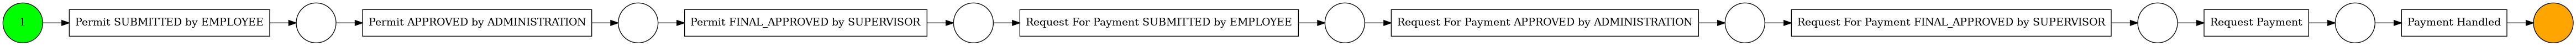

fitness : 1.0 / size of C : 1 / size of R 201


612


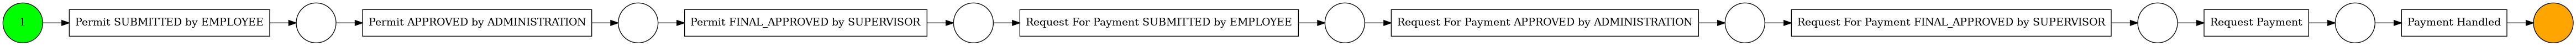

fitness : 0.9912173202614379 / size of C : 2 / size of R 200


626


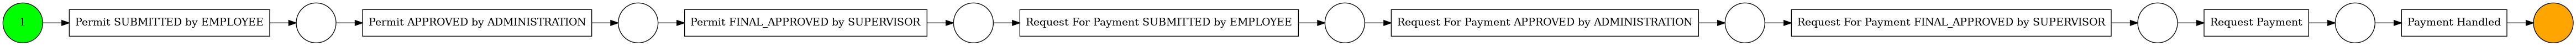

fitness : 0.9886182108626198 / size of C : 3 / size of R 199


629


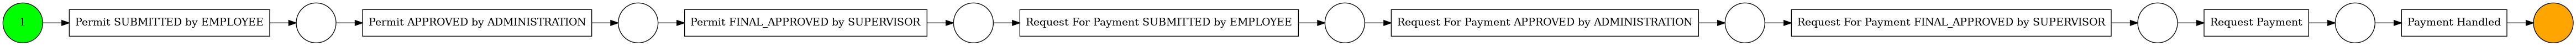

fitness : 0.9880763116057234 / size of C : 4 / size of R 198


631


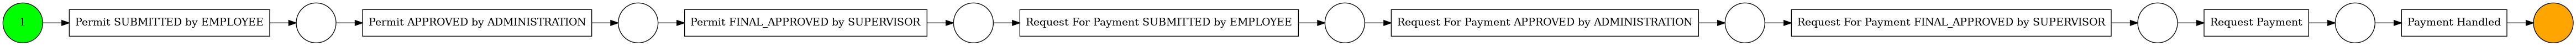

fitness : 0.9877179080824089 / size of C : 5 / size of R 197


633


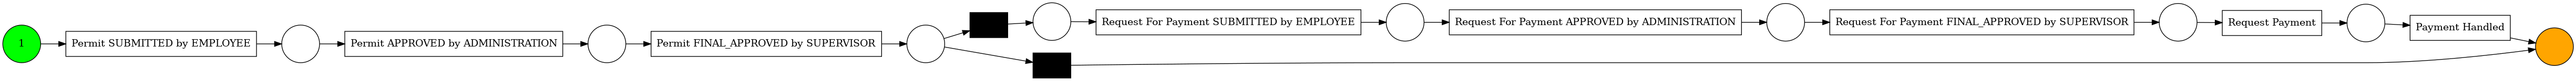

fitness : 0.9816171190578826 / size of C : 6 / size of R 196


652


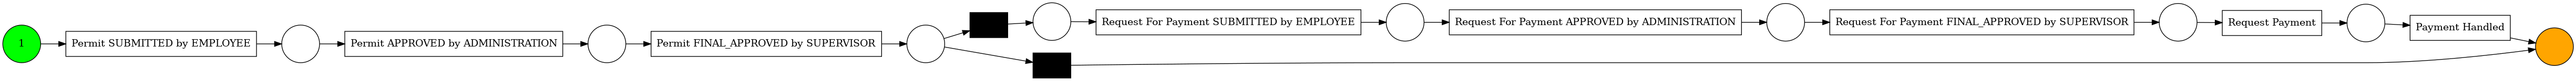

fitness : 0.9797243911507755 / size of C : 7 / size of R 195


658


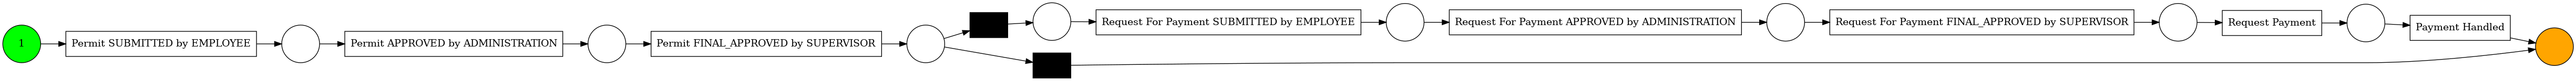

fitness : 0.9791493967025918 / size of C : 8 / size of R 194


659


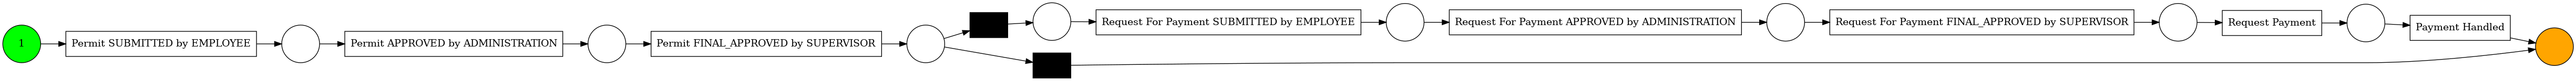

fitness : 0.9788016737940901 / size of C : 9 / size of R 193


660


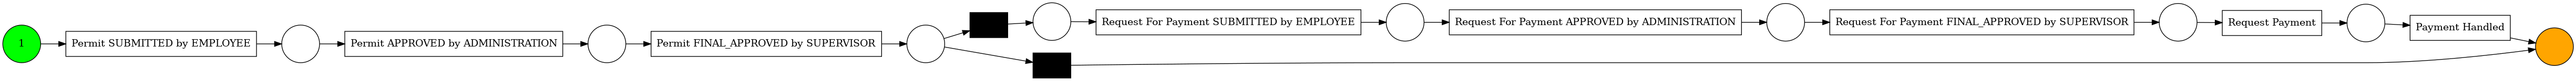

fitness : 0.9786006922370594 / size of C : 10 / size of R 192


971


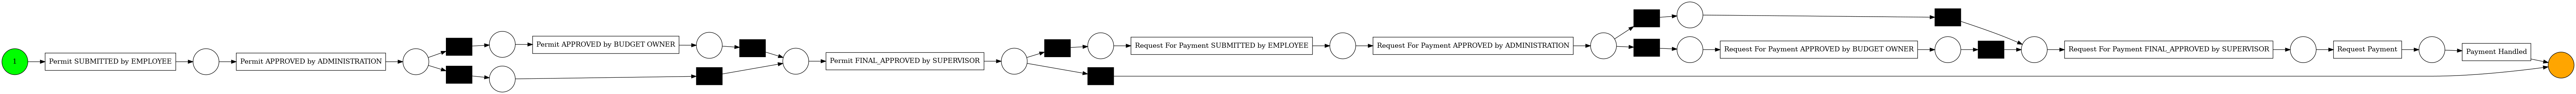

fitness : 0.9876001958906215 / size of C : 11 / size of R 191


999


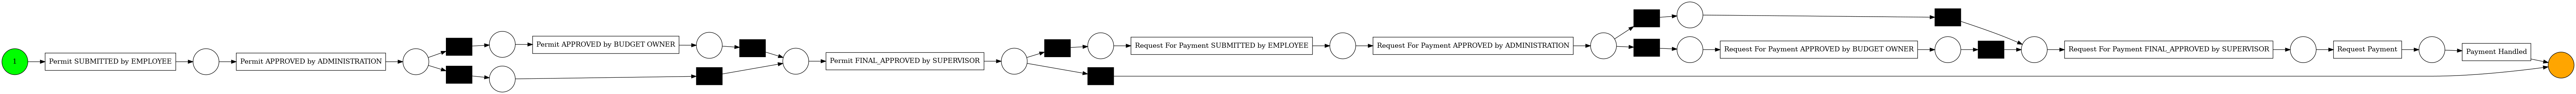

fitness : 0.9814797314797349 / size of C : 12 / size of R 190


1004


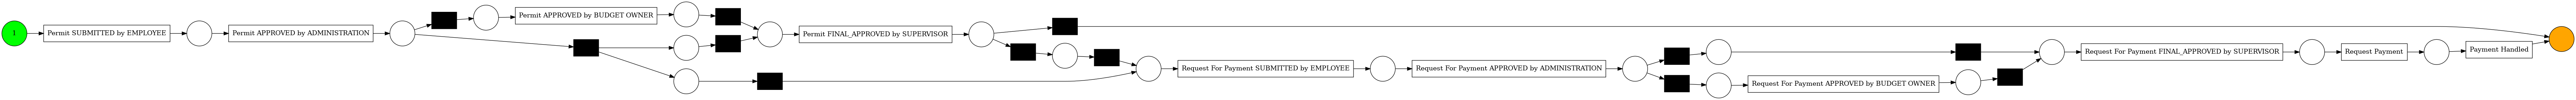

fitness : 0.9254693679494371 / size of C : 13 / size of R 189


1009


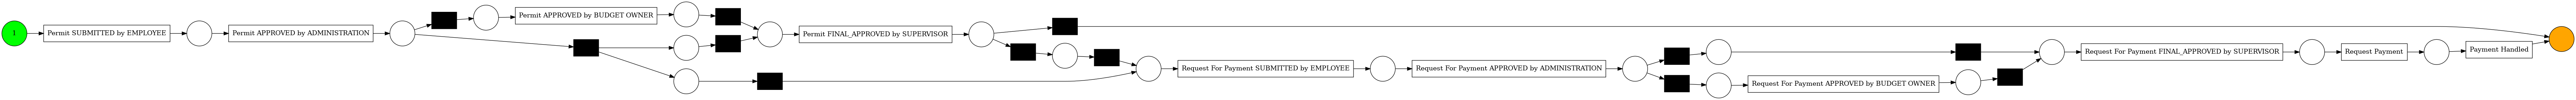

fitness : 0.9244228681790517 / size of C : 14 / size of R 188


1014


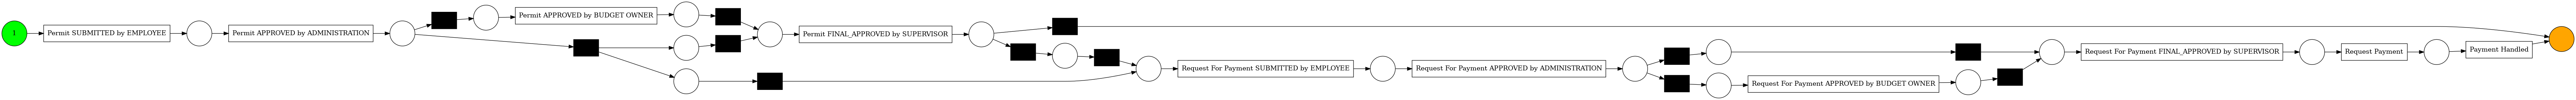

fitness : 0.9240911127005691 / size of C : 15 / size of R 187


1019


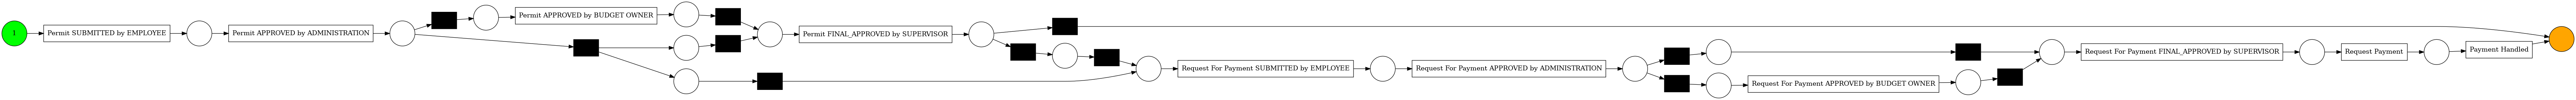

fitness : 0.9237626129186374 / size of C : 16 / size of R 186


1022


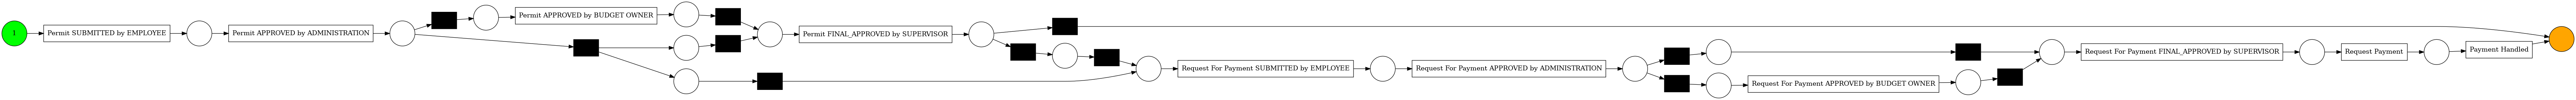

fitness : 0.9235670559055971 / size of C : 17 / size of R 185


1024


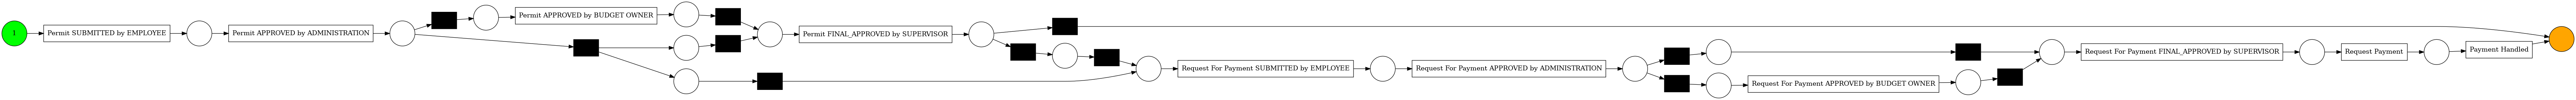

fitness : 0.9231583032852456 / size of C : 18 / size of R 184


1025


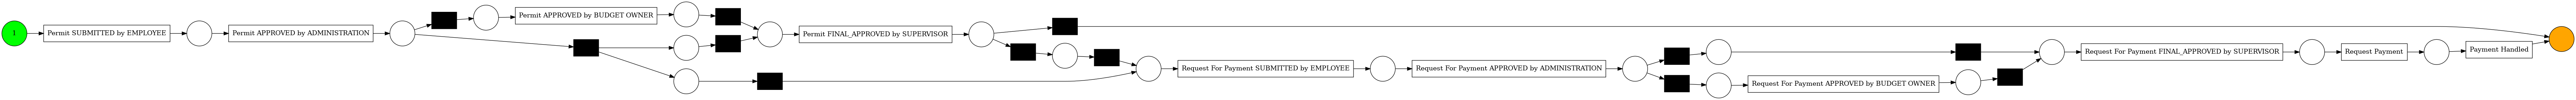

fitness : 0.9229545251496363 / size of C : 19 / size of R 183


1026


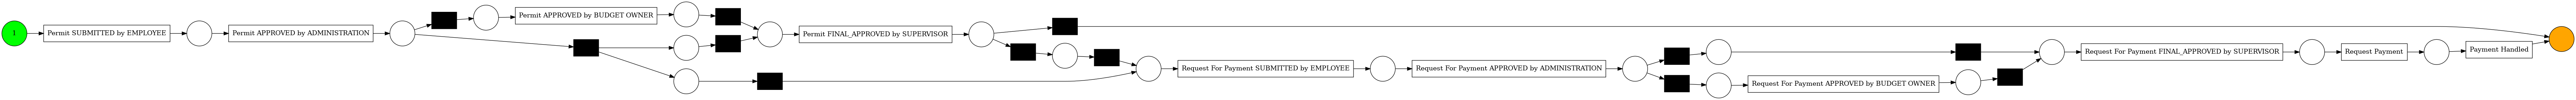

fitness : 0.9227511442423615 / size of C : 20 / size of R 182


1027


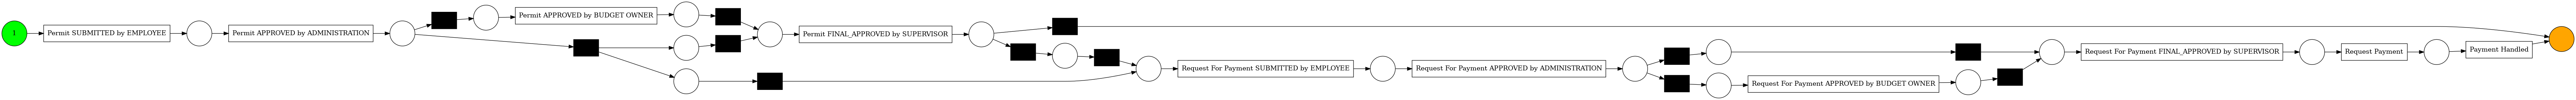

fitness : 0.9225481594030658 / size of C : 21 / size of R 181


1028


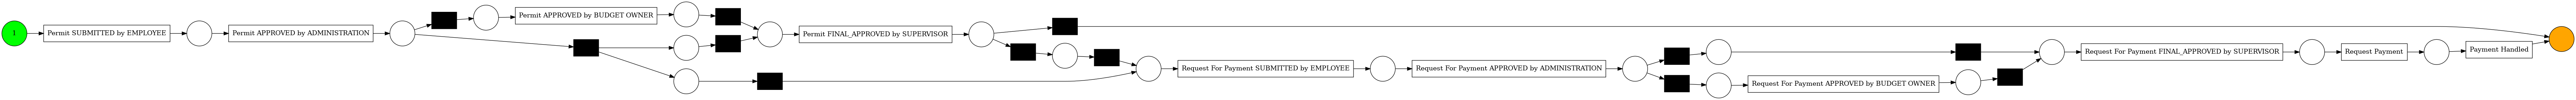

fitness : 0.9224845355681823 / size of C : 22 / size of R 180


1030


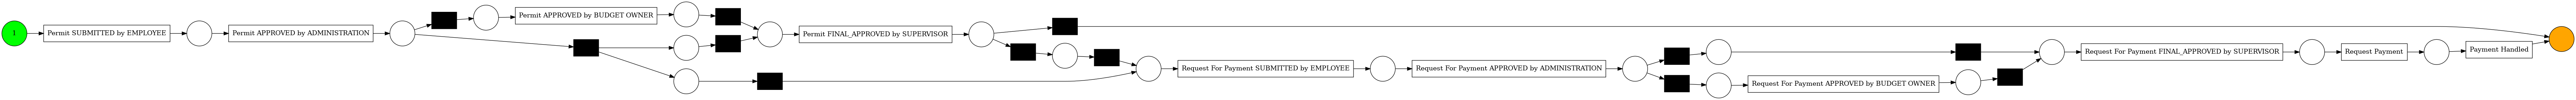

fitness : 0.9222923896967193 / size of C : 23 / size of R 179


1031


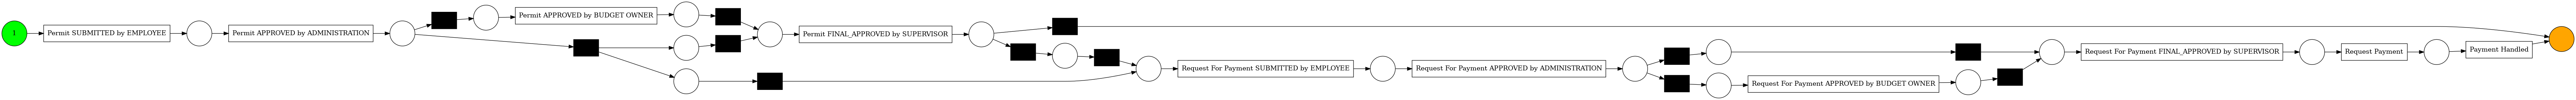

fitness : 0.9221522203350133 / size of C : 24 / size of R 178


1035


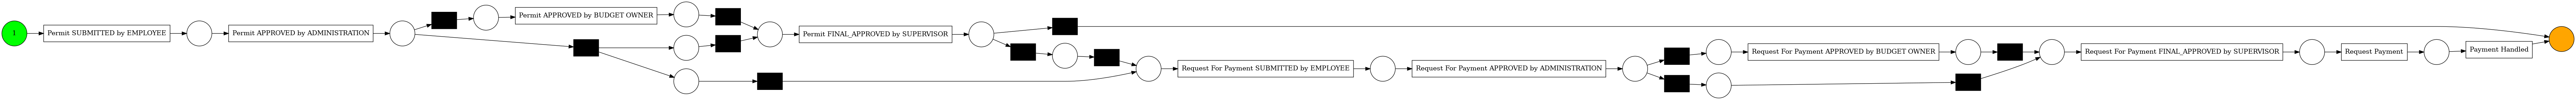

fitness : 0.9218089589359728 / size of C : 25 / size of R 177


1061


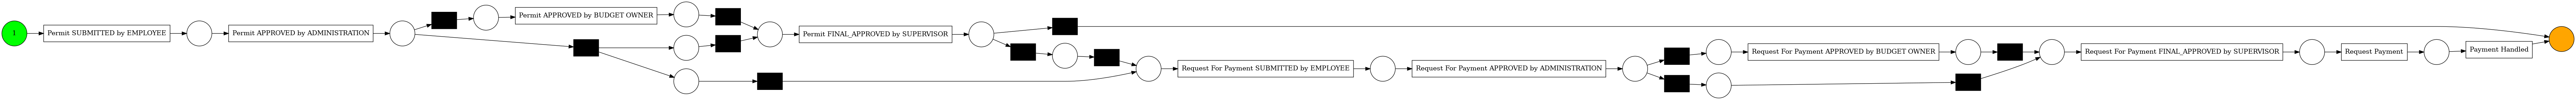

fitness : 0.9194006005698543 / size of C : 26 / size of R 176


1064


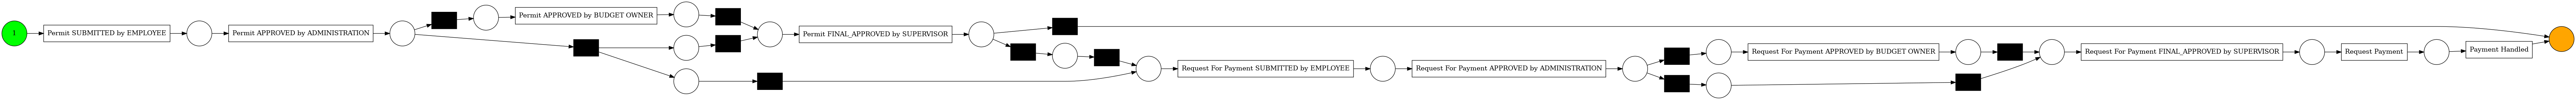

fitness : 0.9187985754355631 / size of C : 27 / size of R 175


1065


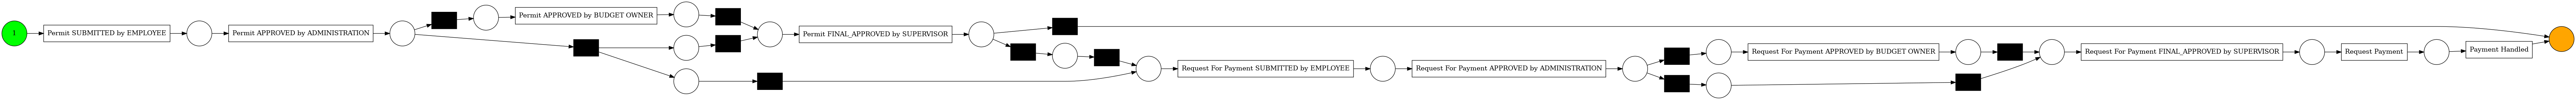

fitness : 0.9187091208217877 / size of C : 28 / size of R 174


1066


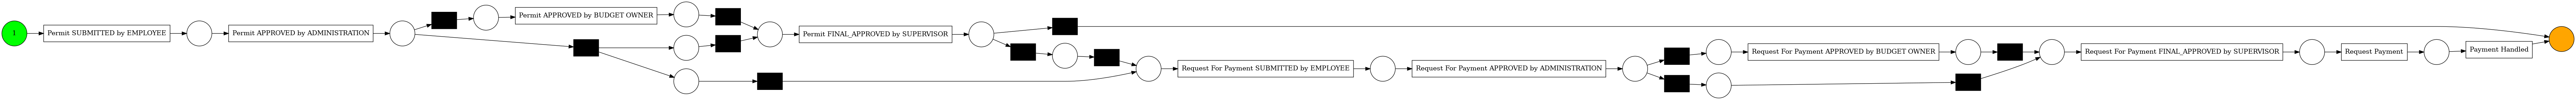

fitness : 0.9186198340403082 / size of C : 29 / size of R 173


1067


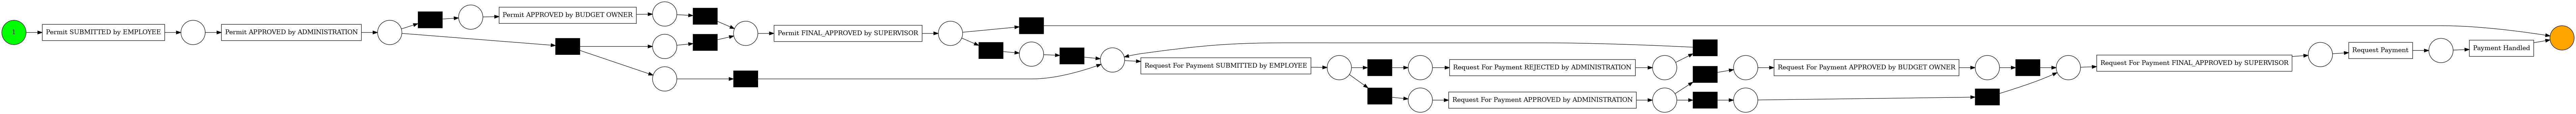

fitness : 0.9214289685787473 / size of C : 30 / size of R 172


1068


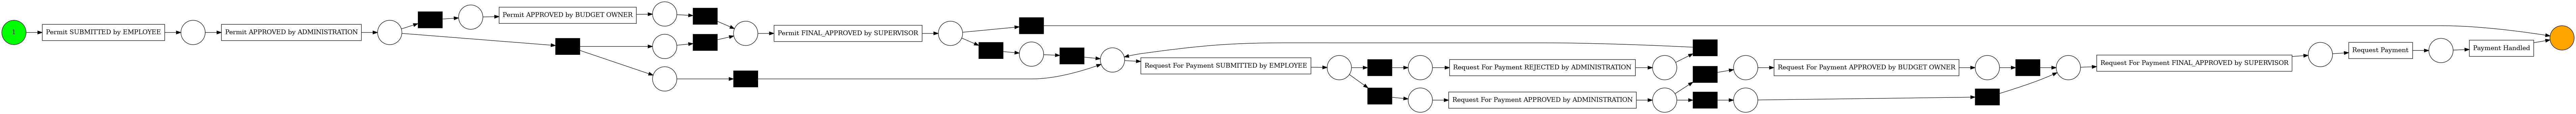

fitness : 0.9214089040014264 / size of C : 31 / size of R 171


1069


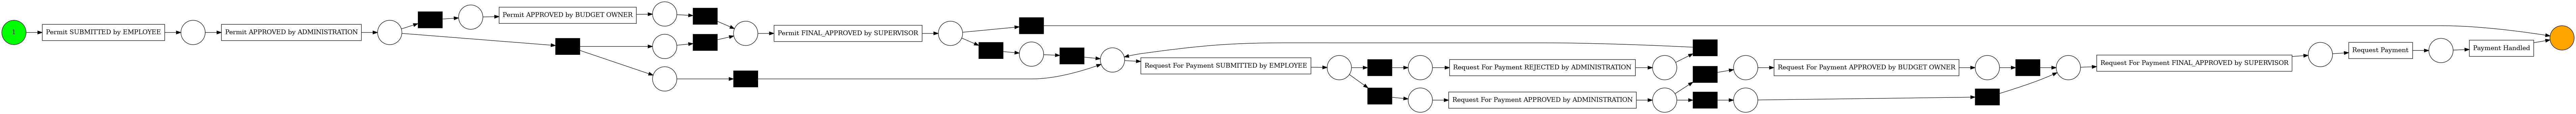

fitness : 0.9212745437336775 / size of C : 32 / size of R 170


1070


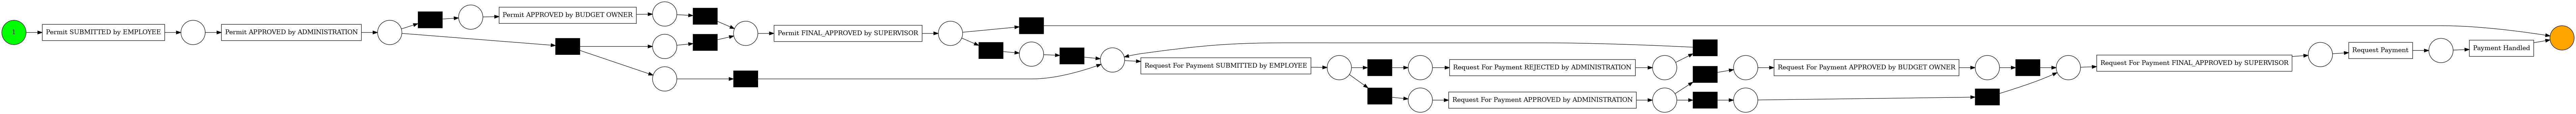

fitness : 0.9212897077114964 / size of C : 33 / size of R 169


1123


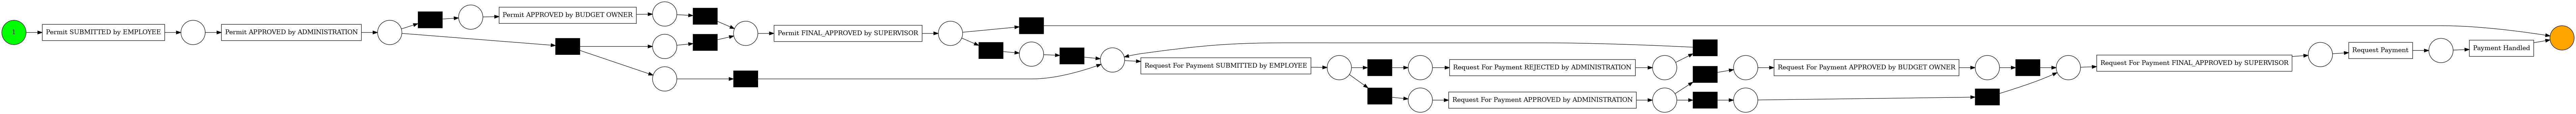

fitness : 0.9187117725597815 / size of C : 34 / size of R 168


1130


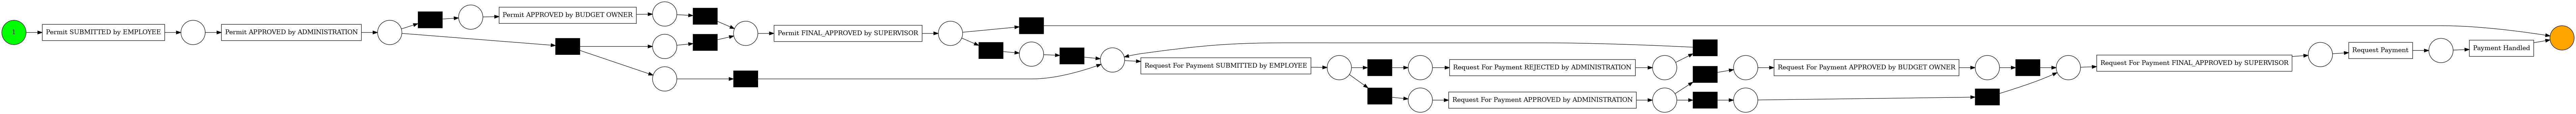

fitness : 0.9175634105468746 / size of C : 35 / size of R 167


1134


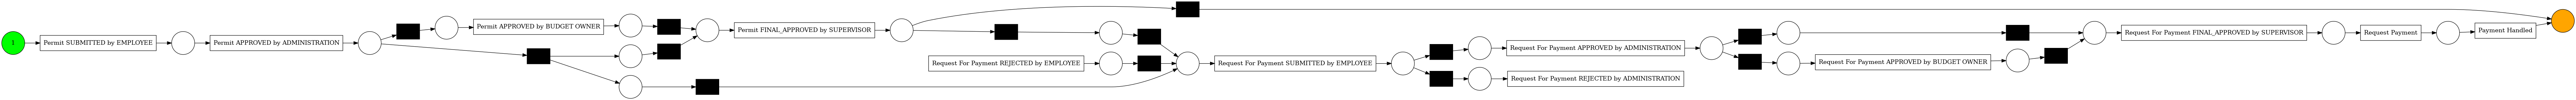

fitness : 0.9317169571215523 / size of C : 36 / size of R 166


1136


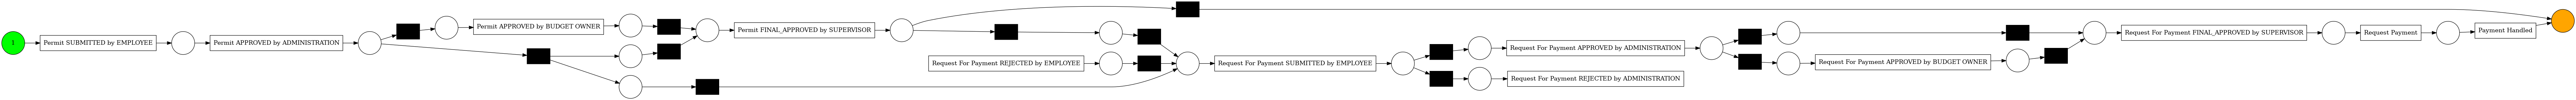

fitness : 0.9317198028543197 / size of C : 37 / size of R 165


1137


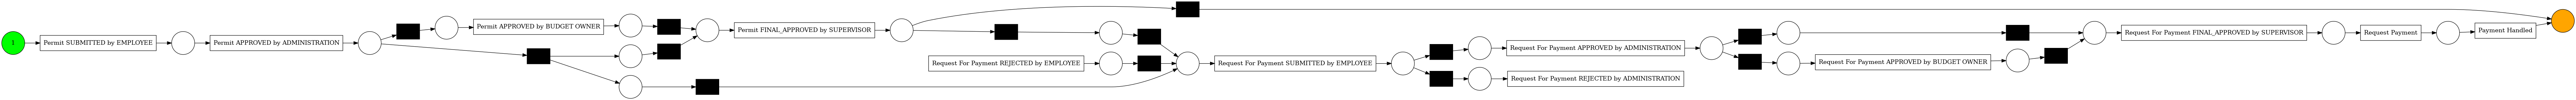

fitness : 0.9316821327452911 / size of C : 38 / size of R 164


1138


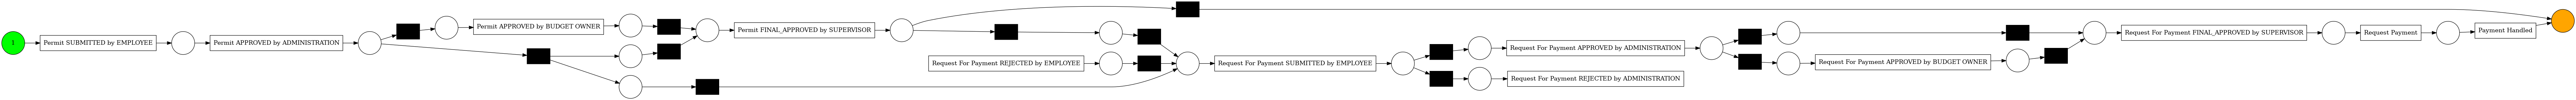

fitness : 0.9316933474304396 / size of C : 39 / size of R 163


1139


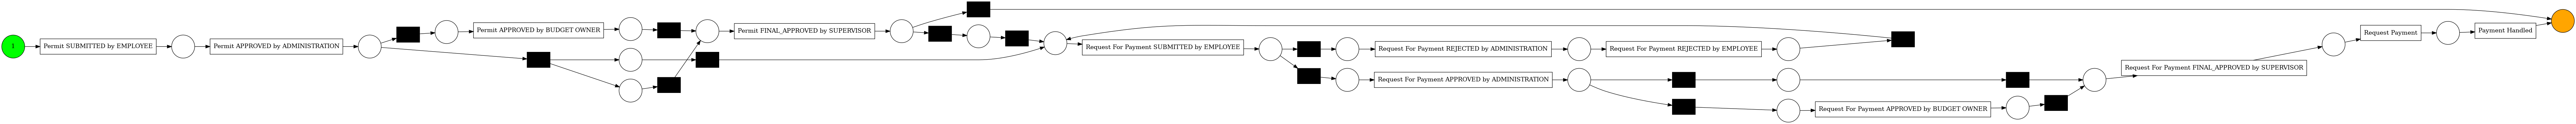

fitness : 0.9227219511653622 / size of C : 40 / size of R 162


1142


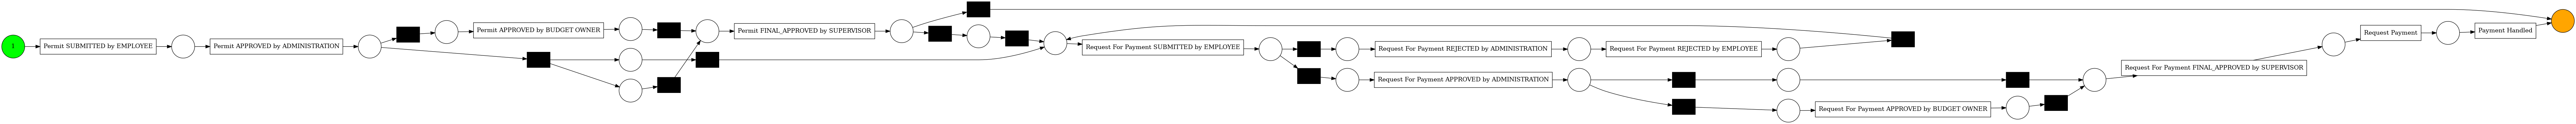

fitness : 0.9222682157419854 / size of C : 41 / size of R 161


1143


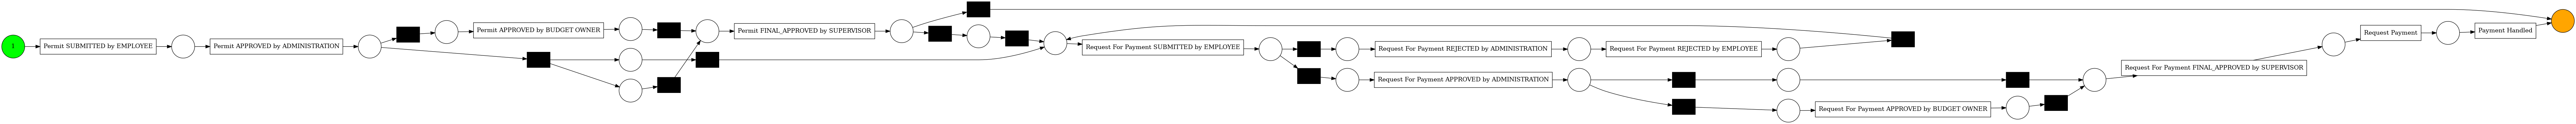

fitness : 0.9220628192277753 / size of C : 42 / size of R 160


1144


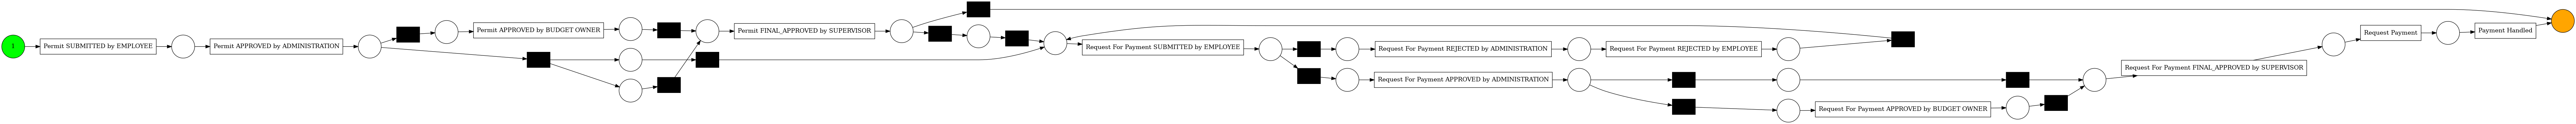

fitness : 0.9220143960174944 / size of C : 43 / size of R 159


1152


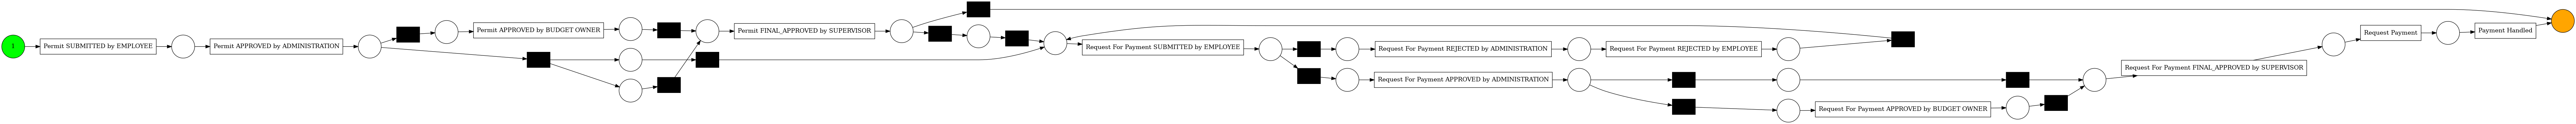

fitness : 0.9210127528352743 / size of C : 44 / size of R 158


1153


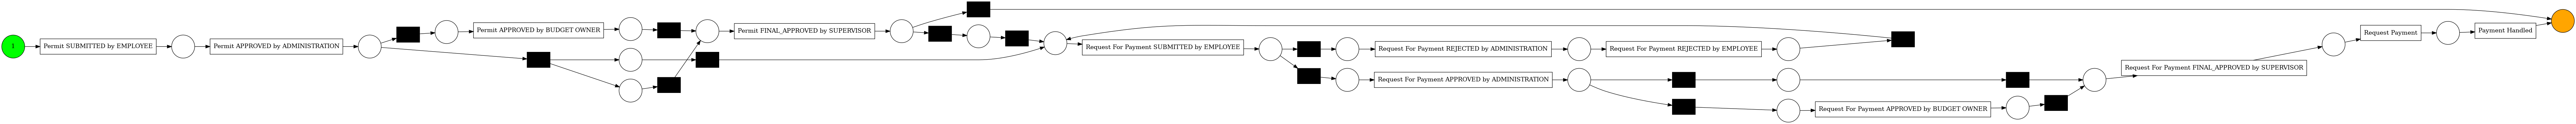

fitness : 0.9206957908254915 / size of C : 45 / size of R 157


1154


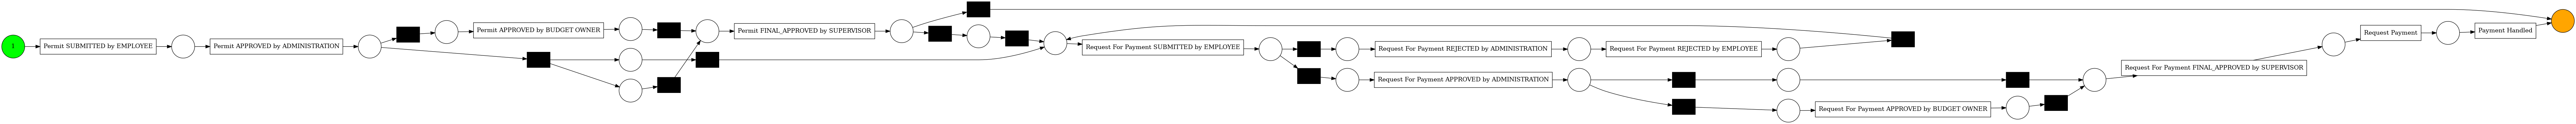

fitness : 0.9204494024767378 / size of C : 46 / size of R 156


1155


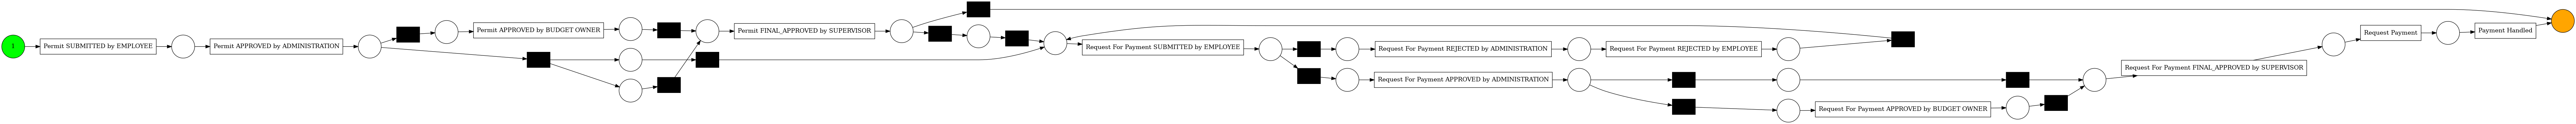

fitness : 0.9202296771643481 / size of C : 47 / size of R 155


1156


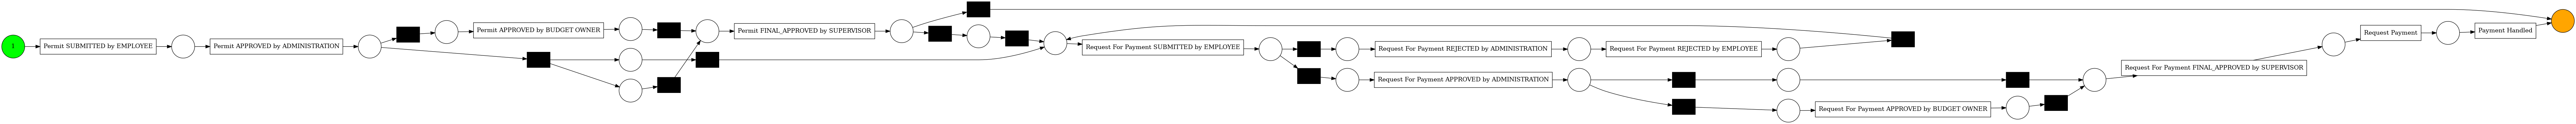

fitness : 0.9198407139793393 / size of C : 48 / size of R 154


1157


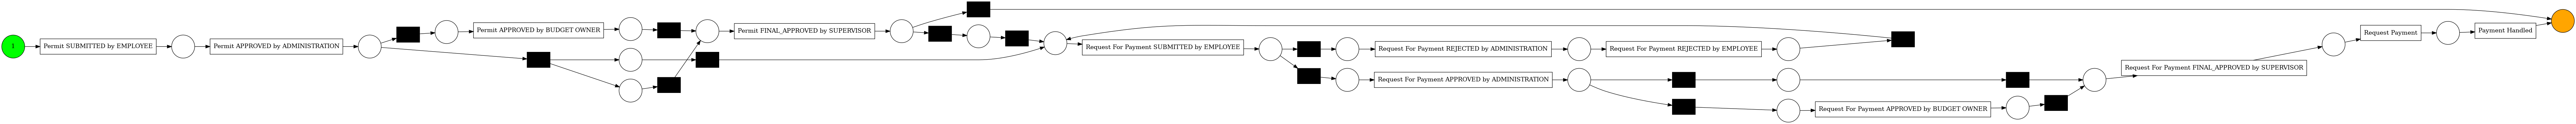

fitness : 0.919525860774133 / size of C : 49 / size of R 153


1158


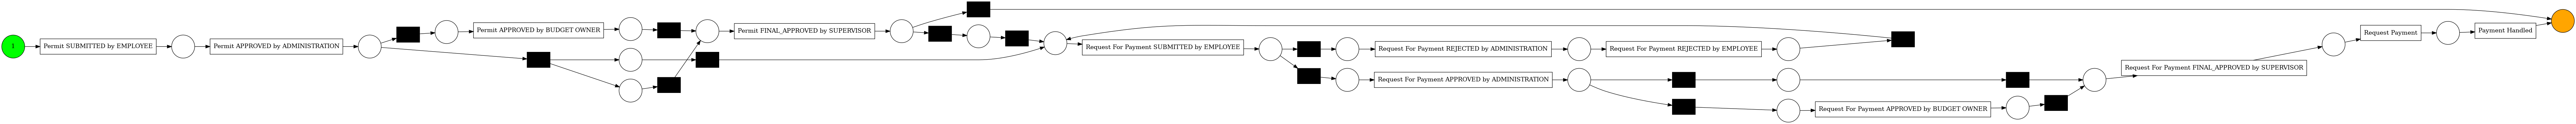

fitness : 0.9193075022299987 / size of C : 50 / size of R 152


1159


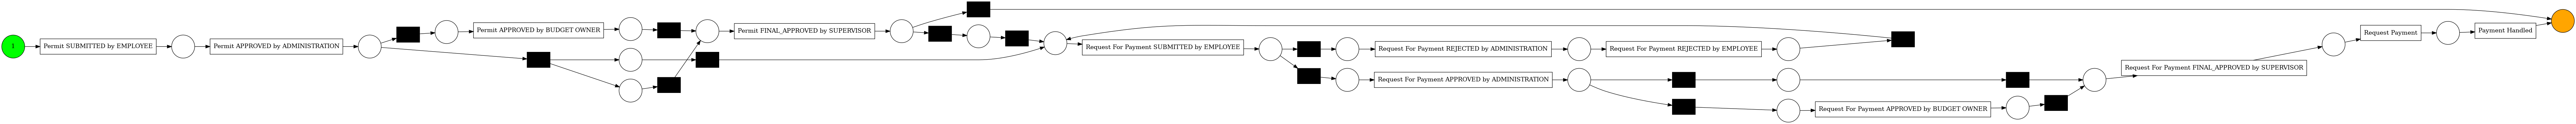

fitness : 0.9191853885764593 / size of C : 51 / size of R 151


1160


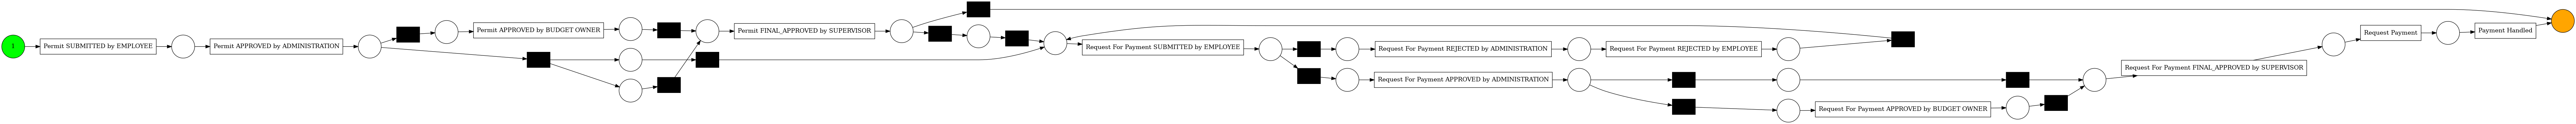

fitness : 0.9189856597932037 / size of C : 52 / size of R 150


1168


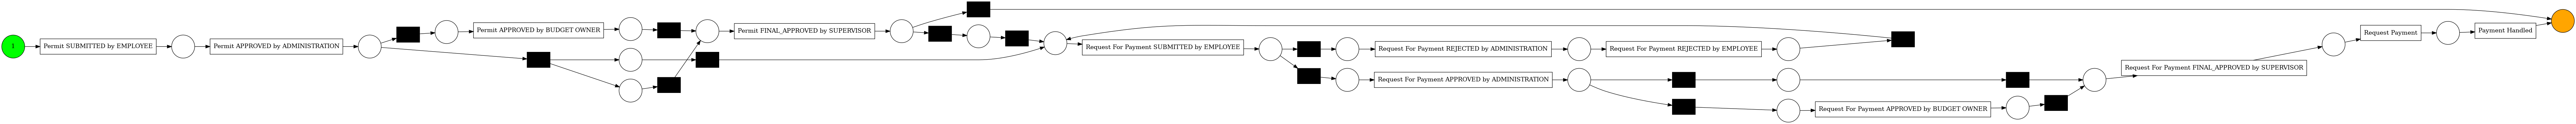

fitness : 0.9174001415754428 / size of C : 53 / size of R 149


1170


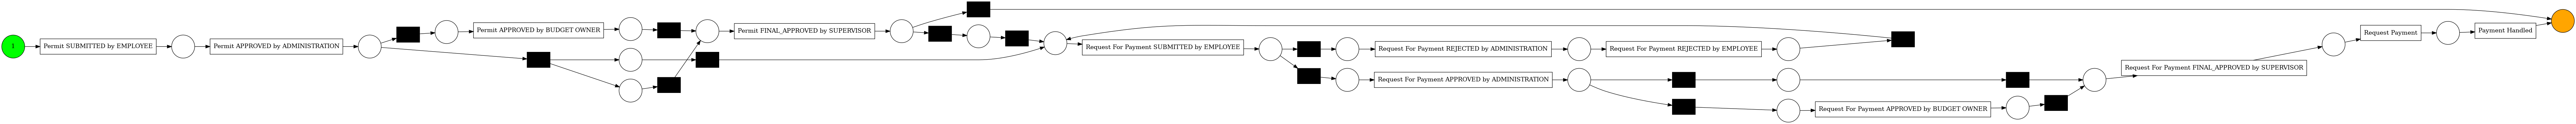

fitness : 0.9170854974587896 / size of C : 54 / size of R 148


1171


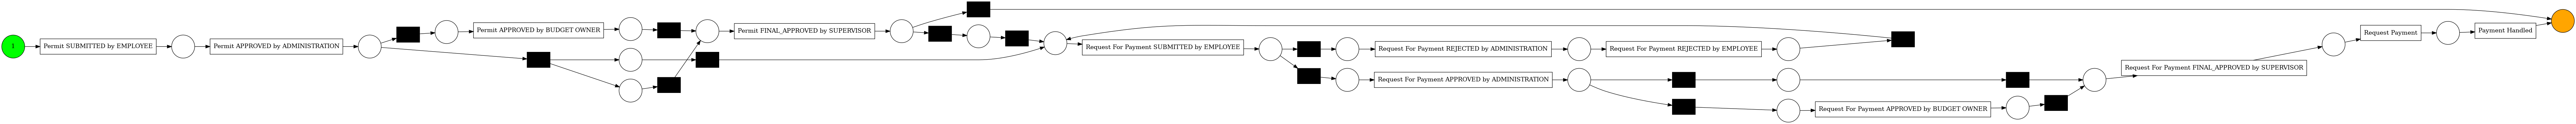

fitness : 0.9167008528552097 / size of C : 55 / size of R 147




In [ ]:
CS=[]
for i in range(nb_clus) : 
    print("\n\n\n{} cluster to be created".format(i))
    C = []
    C, R = clustering(C,R, log)
    CS.append(C)


In [243]:
CS[1][0]

'Permit SUBMITTED by EMPLOYEE,Permit APPROVED by ADMINISTRATION,Permit APPROVED by BUDGET OWNER,Permit FINAL_APPROVED by SUPERVISOR,Request For Payment SUBMITTED by EMPLOYEE,Request For Payment APPROVED by ADMINISTRATION,Request For Payment APPROVED by BUDGET OWNER,Request For Payment FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled'

In [260]:
len(variants_filter
    .apply(
        log, CS[0][-1]
    )
)

43

In [262]:
CS[0]

['Permit SUBMITTED by EMPLOYEE,Permit APPROVED by ADMINISTRATION,Permit FINAL_APPROVED by SUPERVISOR,Request For Payment SUBMITTED by EMPLOYEE,Request For Payment APPROVED by ADMINISTRATION,Request For Payment FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled',
 'Permit SUBMITTED by EMPLOYEE,Permit APPROVED by ADMINISTRATION,Request For Payment SUBMITTED by EMPLOYEE,Permit FINAL_APPROVED by SUPERVISOR,Request For Payment APPROVED by ADMINISTRATION,Request For Payment FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled',
 'Permit SUBMITTED by EMPLOYEE,Permit APPROVED by ADMINISTRATION,Request For Payment SUBMITTED by EMPLOYEE,Request For Payment APPROVED by ADMINISTRATION,Request For Payment FINAL_APPROVED by SUPERVISOR,Permit FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled',
 'Permit SUBMITTED by EMPLOYEE,Permit APPROVED by ADMINISTRATION,Request For Payment SUBMITTED by EMPLOYEE,Request For Payment APPROVED by ADMINISTRATION,Request For Payment FINAL_A

In [254]:
len(variants_filter.apply(log, CS[2][2]))

4

344


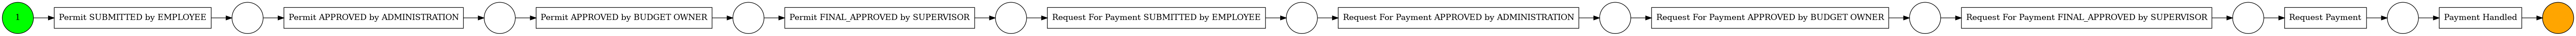

In [264]:
HM_Draw(log, CS[1])

In [213]:
def clustering ( C:list ,R:list, log ) -> (list, list) : 
    fit=1.0
    while (fit > tf) : 
        min_avg_dist = len(activities) #dist cannot be larger than the number of all activities 
        cur_dpi = []
        
        if not C : #if C is empty set
            cur_dpi = R[0]
        else :
            for r in R : 
                sum_dist = 0
                for c in C : 
                    sum_dist += dist_btw_set(r,c)
                
                if sum_dist/len(C) < min_avg_dist : 
                    min_avg_dist = sum_dist/len(C)
                    cur_dpi = r
                else :
                    print

#         print("cur_dpi :{}          with the dist {}".format(cur_dpi,min_avg_dist))
        fit = fit_check_w_HM(log, cur_dpi, C)
        if fit > tf : 
            R.remove(cur_dpi)
            C.append(cur_dpi) # added to C
            C = list(set(C)) # remove from R
            HM_Draw(log,C)
        print(
            "fitness : {} / size of C : {} / size of R {}\n\n"
            .format(fit, len(C), len(R))
        )
        
    return C,R

In [193]:
from pm4py.algo.discovery.heuristics import factory as heuristics_miner
from pm4py.evaluation.replay_fitness import factory as replay_factory

def fit_check_w_HM(log :list, cur_dpi :list, C :list) -> float: 
    log = variants_filter.apply( # get the log containing variants in C 
            log, 
            [c for c in C + [cur_dpi]]  
    ) 
    heu_net = heuristics_miner.apply_heu(log, parameters={"dependency_thresh": 0.99})
    net, im, fm = heuristics_miner.apply(log, parameters={"dependency_thresh": 0.99})
    fit = replay_factory.apply(log, net, im, fm )
    return fit['averageFitness']

# line 16 fitness check 

In [34]:
def dist_btw_set(trace1,trace2, output=False) : 
    A = set(trace1.split(','))
    B = set(trace2.split(','))
    if output : 
        print("\nA SET", A)
        print("\nB SET", B)
        print("\nUNION", A.union(B))
        print("\nINTERSECTION", A.intersection(B))
        print("\nDIFFERENCE", A.union(B) - A.intersection(B))
    return(len(A.union(B) - A.intersection(B)))

In [ ]:
dist_btw_traces(variants_count[0]['variant'], variants_count[1]['variant'], True)

In [ ]:
C = 

In [ ]:
W_variant

In [ ]:
def min_distance_seeker(dpi, C) :
    import sys
    min_dist = sys.maxsize #Instead of inf. 
    for c in C : 
        if min_dist > dist_btw_traces(dpi,c) : 
            min_dpi = c
    return min_dpi

In [ ]:
min_distance_seeker(
    variants_count[0]['variant'],
    

)

In [ ]:
#Initialization
R = [i for i in range(len(variants_count))]

In [ ]:
for r in R :
    dist_list = []
    dist_dpi = 0 #temp variable for distance sum
    min_dpi_dist = np.inf
    min_dpi = np.NaN
    
    for c in C : 
        dist_dpi += distance_of_two_set(r,c, variants_count)
    if dist_dpi / len(C) < min_dpi_dist : #if average is less than min_dpi, then update
        min_dpi_dist = dist_dpi / len(C)
        min_dpi = r
        
    print("among R variant", variants_count[r]['variant'], min_dpi_dist/len(C))

fitness_inductive= 1.0


/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use evaluator entrypoint instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
distance_of_two_set(1,9,variants_count, True)

In [ ]:
#parameter
w = 0.5  #window size
tf = 0.8 #target fitness
nb_clus = 3 #number of cluster
N = 1 #case separate 




from pm4py.visualization.heuristics_net import factory as hn_vis_factory
gviz = hn_vis_factory.apply(heu_net)
hn_vis_factory.view(gviz)

from pm4py.visualization.petrinet import factory as pn_vis_factory
gviz = pn_vis_factory.apply(net, im, fm)
pn_vis_factory.view(gviz)